In [ ]:
#import libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving SepsisBiomarkersProcessed.csv to SepsisBiomarkersProcessed.csv


In [ ]:
df = pd.read_csv(open("SepsisBiomarkersProcessed.csv", "r"))
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.dtypes

Age (years)                                                                                   float64
Gender (female/male)                                                                          float64
Systolic blood pressure (mmHg)                                                                float64
Respiratory rate (breaths/min)                                                                float64
Oxygen saturation (%)                                                                         float64
Heart rate (beats/min)                                                                        float64
Body temperature (oC)                                                                         float64
Haemoglobin (g/L)                                                                             float64
Leukocyte particle concentration (x109 cells/L)                                               float64
C-reactive protein (mg/L)                                                         

In [ ]:
df.head()

Age (years)  ...  Bacterial sepsis using Sepsis-3 criteria (yes/no)
0         79.0  ...                                                0.0
1         78.0  ...                                                1.0
2         54.0  ...                                                0.0
3         52.0  ...                                                0.0
4         72.0  ...                                                1.0

[5 rows x 22 columns]

In [ ]:
df2 = df.replace(-1,np.NaN)
df2.head()

Age (years)  ...  Bacterial sepsis using Sepsis-3 criteria (yes/no)
0         79.0  ...                                                0.0
1         78.0  ...                                                1.0
2         54.0  ...                                                0.0
3         52.0  ...                                                0.0
4         72.0  ...                                                1.0

[5 rows x 22 columns]

In [ ]:
df2 = df2.dropna()
df2.head()

Age (years)  ...  Bacterial sepsis using Sepsis-3 criteria (yes/no)
0         79.0  ...                                                0.0
2         54.0  ...                                                0.0
3         52.0  ...                                                0.0
5         57.0  ...                                                1.0
6         76.0  ...                                                1.0

[5 rows x 22 columns]

In [ ]:
print(len(df2.index))
print(len(df.index))

1194
1572


In [ ]:
df2['Heart rate (beats/min)'].min()

51.0

In [ ]:
#this df is set up to only have the features that a healthcare professional would have access to on presentation
#SOFA is not included due it being an aggregate feature
#SIRS not included for the same reasons and due to being subjective, also a very strong individual predictor which skews results
df_sepsis_3 = df2.drop(columns = ['28 days survival (yes/no)', 'Positve blood culture (yes/no)', 'Proven bacterial infection (yes/no)', 'Bacterial sepsis using Sepsis-2 criteria (yes/no/cannot be determined)', 'Severe bacterial sepsis/septic shock using Sepsis-2 criteria (yes/no/cannot be determined)', 'Intensive care unit (yes/no)', 'Systemic inflammatory response syndrome (yes/no/cannot be determined)', 'SOFA score ≥2 (yes/no)'])
df_sepsis_3

Age (years)  ...  Bacterial sepsis using Sepsis-3 criteria (yes/no)
0            79.0  ...                                                0.0
2            54.0  ...                                                0.0
3            52.0  ...                                                0.0
5            57.0  ...                                                1.0
6            76.0  ...                                                1.0
...           ...  ...                                                ...
1565         46.0  ...                                                0.0
1566         18.0  ...                                                0.0
1567         67.0  ...                                                0.0
1569         63.0  ...                                                0.0
1570         73.0  ...                                                0.0

[1194 rows x 14 columns]

In [ ]:
#here is the part where we can start messing around with machine learning
X_train, X_test, y_train, y_test = train_test_split(df_sepsis_3.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1), 
                                                    df_sepsis_3['Bacterial sepsis using Sepsis-3 criteria (yes/no)'], 
                                                    test_size=0.20, 
                                                    random_state = 10000)


In [ ]:
#borrowed from a towards data science article... cite this properly if you stick with this
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78       146
         1.0       0.67      0.45      0.54        93

    accuracy                           0.70       239
   macro avg       0.69      0.65      0.66       239
weighted avg       0.69      0.70      0.68       239



In [ ]:
df4 = X_test
df4['Sepsis-3 Predicted (logistic regression)'] = predictions
df4['Sepsis-3 Actual'] = y_test
df4

Age (years)  ...  Sepsis-3 Actual
619          69.0  ...              1.0
173          80.0  ...              0.0
1161         93.0  ...              0.0
1328         70.0  ...              1.0
457          89.0  ...              0.0
...           ...  ...              ...
1158         72.0  ...              0.0
1189         75.0  ...              1.0
759          84.0  ...              0.0
450          77.0  ...              1.0
380          82.0  ...              0.0

[239 rows x 15 columns]

In [ ]:
len(df4[df4['Sepsis-3 Predicted (logistic regression)']==df4['Sepsis-3 Actual']])

167

In [ ]:
#actually a pretty well-balanced sample
len(df4[df4['Sepsis-3 Actual']==1])

93

In [ ]:
#l is a list of params, m is model
def predict_output(l, m):
  print(m.predict(l))

In [ ]:
single_prediction = np.array([50.0, 1, 100, 33.0, 93.0, 74.0, 38, 87, 15, 300.0, 0.46, 10.7, 1.86]).reshape(1, -1)
predict_output(single_prediction, model)

[0.]


In [ ]:
#will have to normalize for lstm probably
from sklearn import preprocessing

indices = ['Age (years)',	'Gender (female/male)',	'Systolic blood pressure (mmHg)',	'Respiratory rate (breaths/min)',
           'Oxygen saturation (%)',	'Heart rate (beats/min)',	'Body temperature (oC)',	'Haemoglobin (g/L)',	
           'Leukocyte particle concentration (x109 cells/L)',	'C-reactive protein (mg/L)',	'Procalcitonin (ng/mL)',
           'Neutrophil-lymphocyte count ratio',	'P-lactate (mmol/L)',	'Bacterial sepsis using Sepsis-3 criteria (yes/no)']
np_values_array = df_sepsis_3.values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled_values = min_max_scaler.fit_transform(np_values_array)
df_normal = pd.DataFrame(df_scaled_values, columns = indices)
df_normal.head()

Age (years)  ...  Bacterial sepsis using Sepsis-3 criteria (yes/no)
0     0.743902  ...                                                0.0
1     0.439024  ...                                                0.0
2     0.414634  ...                                                0.0
3     0.475610  ...                                                1.0
4     0.707317  ...                                                1.0

[5 rows x 14 columns]

In [ ]:
print(len(df_normal.index))

1194


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
dfvalues = df_normal.values.astype('float32')

In [ ]:
#borrowed this from my complex data project
def NN_function(df_arg, train_size, number_of_layers, number_of_epochs, activation_function):
  
  nn_indices = df_arg.columns
  nn_np_values_array = df_arg.values
  nn_min_max_scaler = preprocessing.MinMaxScaler()
  nn_df_scaled_values = nn_min_max_scaler.fit_transform(nn_np_values_array)
  dfnv = pd.DataFrame(nn_df_scaled_values, columns = nn_indices)

#  dfnv_x = df_arg.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
#  dfnv_y = df_arg['Bacterial sepsis using Sepsis-3 criteria (yes/no)']
#  X_train, X_test, y_train, y_test = train_test_split(dfnv_x, dfnv_y, test_size=1-train_size, random_state = 10000)  

  dfnv_x = dfnv.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
  dfnv_y = dfnv['Bacterial sepsis using Sepsis-3 criteria (yes/no)']
  X_train, X_test, y_train, y_test = train_test_split(dfnv_x, dfnv_y, test_size=1-train_size, random_state = 10000)  


  trainxr = X_train.values.astype('float32')
  testxr = X_test.values.astype('float32')
  trainy = y_train.values.astype('float32')
  testy = y_test.values.astype('float32')

  model = keras.Sequential()

  if (number_of_layers!=1):
    for i in range(number_of_layers-1):
      model.add(layers.Dense(32, activation=activation_function))
    model.add(layers.Dense(32, activation=activation_function))

  model.add(layers.Dense(1, activation='sigmoid'))

  opt = keras.optimizers.Adam(lr=0.0005)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  history = model.fit(trainxr, trainy, epochs=number_of_epochs, batch_size=64, validation_data=(testxr, testy), verbose=2, shuffle=True)

  #plot the loss values 
  plt.plot(history.history['loss'], label='Training loss')
  plt.plot(history.history['val_loss'], label='Test loss')
  plt.legend()
  plt.show()

  #evaluation
  prediction_vector = model.predict(testxr)
  index = 0
  correct = 0
  for i in np.around(prediction_vector):
    if i == testy[index]:
      correct+=1
    index+=1
  print("Accuracy:", correct/(index+1))

  print(model.summary())

  return model
#  print("Predictions:", np.around(prediction_vector))

Epoch 1/200
14/14 - 1s - loss: 0.6681 - accuracy: 0.6492 - val_loss: 0.6996 - val_accuracy: 0.5987
Epoch 2/200
14/14 - 0s - loss: 0.6511 - accuracy: 0.6492 - val_loss: 0.6820 - val_accuracy: 0.5987
Epoch 3/200
14/14 - 0s - loss: 0.6470 - accuracy: 0.6492 - val_loss: 0.6768 - val_accuracy: 0.5987
Epoch 4/200
14/14 - 0s - loss: 0.6471 - accuracy: 0.6492 - val_loss: 0.6758 - val_accuracy: 0.5987
Epoch 5/200
14/14 - 0s - loss: 0.6468 - accuracy: 0.6492 - val_loss: 0.6764 - val_accuracy: 0.5987
Epoch 6/200
14/14 - 0s - loss: 0.6465 - accuracy: 0.6492 - val_loss: 0.6766 - val_accuracy: 0.5987
Epoch 7/200
14/14 - 0s - loss: 0.6463 - accuracy: 0.6492 - val_loss: 0.6769 - val_accuracy: 0.5987
Epoch 8/200
14/14 - 0s - loss: 0.6463 - accuracy: 0.6492 - val_loss: 0.6758 - val_accuracy: 0.5987
Epoch 9/200
14/14 - 0s - loss: 0.6461 - accuracy: 0.6492 - val_loss: 0.6771 - val_accuracy: 0.5987
Epoch 10/200
14/14 - 0s - loss: 0.6459 - accuracy: 0.6492 - val_loss: 0.6766 - val_accuracy: 0.5987
Epoch 11/

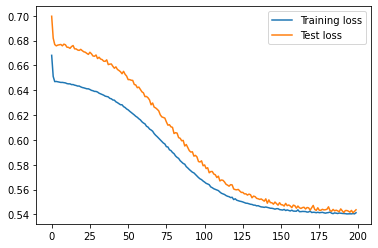

Accuracy: 0.7366666666666667
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#df_arg, train_size, number_of_layers, number_of_epochs, activation_function
nn_model = NN_function(df_normal, 0.75, 2, 200, 'sigmoid')

In [ ]:
dfnv_x = df_normal.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
dfnv_y = df_normal['Bacterial sepsis using Sepsis-3 criteria (yes/no)']
X_train, X_test, y_train, y_test = train_test_split(dfnv_x, dfnv_y, test_size=0.25, random_state = 10000)  
trainxr = X_train.values.astype('float32')
testxr = X_test.values.astype('float32')
trainy = y_train.values.astype('float32')
testy = y_test.values.astype('float32')

prediction_vector = np.around(nn_model.predict(testxr))
prediction_vector

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [ ]:
df_nn = df_sepsis_3.drop('Bacterial sepsis using Sepsis-3 criteria (yes/no)',axis=1)
df_nn_l = df_sepsis_3

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=a03d86a9ef776de00e93c4202c18f17d961cdff7b3ad121a2d3d5e3d7df7b2af
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
shap.initjs()

In [ ]:
#this might not work when the kernel is restarted
#argument works as dfnv_x
def f(X):
  return nn_model.predict(X).flatten()
explainer = shap.KernelExplainer(f, df_nn.sample(n=50, random_state=1))

In [ ]:
#argument works as dfnv_x, if successful should be around 0.56

#this works for individual samples of the df
#this person is medium likely to have sepsis
shap.initjs()
shap_values = explainer.shap_values(dfnv_x.iloc[11,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, df_nn.iloc[11,:])

In [ ]:
#this person is very unlikely to have sepsis
shap.initjs()
shap_values = explainer.shap_values(dfnv_x.iloc[1,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, df_nn.iloc[1,:])

In [ ]:
#this person is very likely to have sepsis
shap.initjs()
shap_values = explainer.shap_values(dfnv_x.iloc[911,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, df_nn.iloc[911,:])

In [ ]:
df_normal.iloc[911,:]

Age (years)                                          0.426829
Gender (female/male)                                 0.000000
Systolic blood pressure (mmHg)                       0.217391
Respiratory rate (breaths/min)                       0.200000
Oxygen saturation (%)                                0.936170
Heart rate (beats/min)                               0.422819
Body temperature (oC)                                0.477273
Haemoglobin (g/L)                                    0.643411
Leukocyte particle concentration (x109 cells/L)      0.058267
C-reactive protein (mg/L)                            0.180934
Procalcitonin (ng/mL)                                0.436918
Neutrophil-lymphocyte count ratio                    0.324806
P-lactate (mmol/L)                                   0.391667
Bacterial sepsis using Sepsis-3 criteria (yes/no)    1.000000
Name: 911, dtype: float64

In [ ]:
index = 0
for i in nn_model.predict(dfnv_x):
  print(index, i)
  index+=1

0 [0.28023422]
1 [0.21739107]
2 [0.11115265]
3 [0.19093996]
4 [0.18141755]
5 [0.21768808]
6 [0.13931]
7 [0.5526499]
8 [0.28466147]
9 [0.36427087]
10 [0.41903323]
11 [0.5529726]
12 [0.13064322]
13 [0.1116305]
14 [0.18494067]
15 [0.36699155]
16 [0.21369642]
17 [0.20312262]
18 [0.5473449]
19 [0.58264554]
20 [0.47705215]
21 [0.18199164]
22 [0.43772158]
23 [0.13051438]
24 [0.1687198]
25 [0.2307348]
26 [0.15006286]
27 [0.2703399]
28 [0.10669452]
29 [0.06770679]
30 [0.22957632]
31 [0.1916064]
32 [0.6670814]
33 [0.48241863]
34 [0.95914376]
35 [0.10916084]
36 [0.47162527]
37 [0.17298329]
38 [0.13481057]
39 [0.5594753]
40 [0.1432147]
41 [0.3987556]
42 [0.21432245]
43 [0.49936947]
44 [0.6244787]
45 [0.5204475]
46 [0.07789499]
47 [0.78910995]
48 [0.5120813]
49 [0.38137895]
50 [0.6226683]
51 [0.27127233]
52 [0.38838714]
53 [0.13261274]
54 [0.34597582]
55 [0.04461566]
56 [0.3310554]
57 [0.28345418]
58 [0.438876]
59 [0.44163266]
60 [0.32147524]
61 [0.4523635]
62 [0.5924348]
63 [0.49208125]
64 [0.3524

In [ ]:
#0 chance you could run this locally unless you had infinite time or an incredible machine
#i may need to refactor this
shap.initjs()
#nnX_train, nnX_test, nny_train, nny_test = train_test_split(df_nn, df_nn, test_size=0.25, random_state = 10000) 
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.Explainer(f, med)
shap_values = explainer(dfnv_x)

Permutation explainer: 1195it [11:41,  1.70it/s]


In [ ]:
shap_values[911]

.values =
array([-0.07500026,  0.        ,  0.03940661, -0.03521129, -0.00753255,
        0.01085461, -0.00908192,  0.00264205,  0.00066953, -0.00038796,
        0.36403405,  0.14968165,  0.11602377])

.base_values =
0.2821425795555115

.data =
array([0.42682927, 0.        , 0.2173913 , 0.2       , 0.93617021,
       0.42281879, 0.47727273, 0.64341085, 0.05826657, 0.18093385,
       0.43691814, 0.3248062 , 0.39166667])

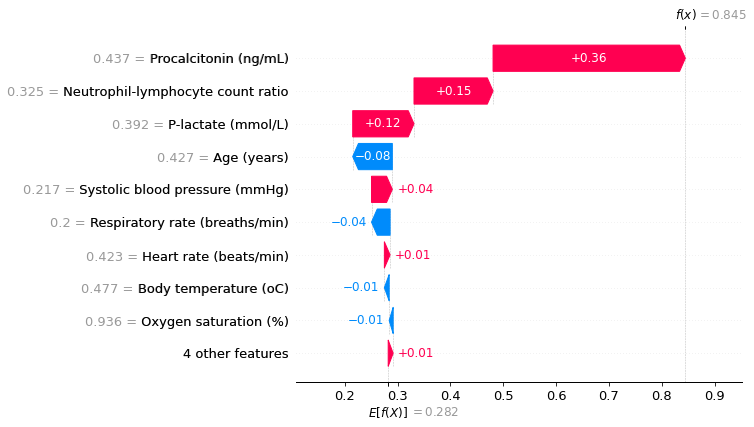

In [ ]:
shap.initjs()
shap.plots.waterfall(shap_values[911])

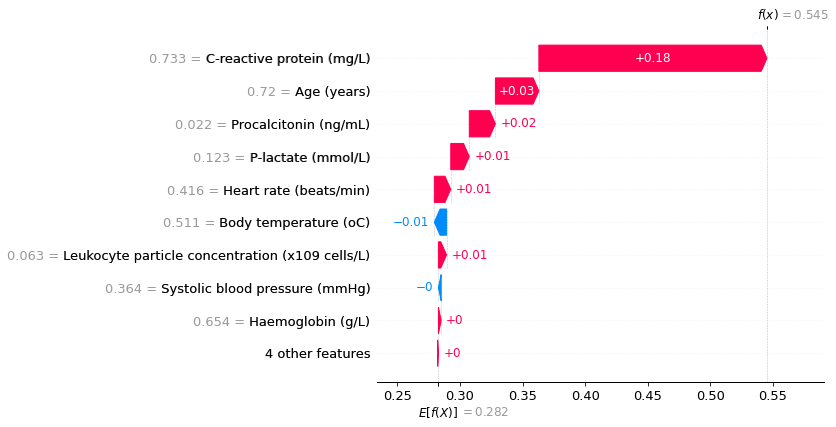

In [ ]:
shap.initjs()
shap.plots.waterfall(shap_values[11])

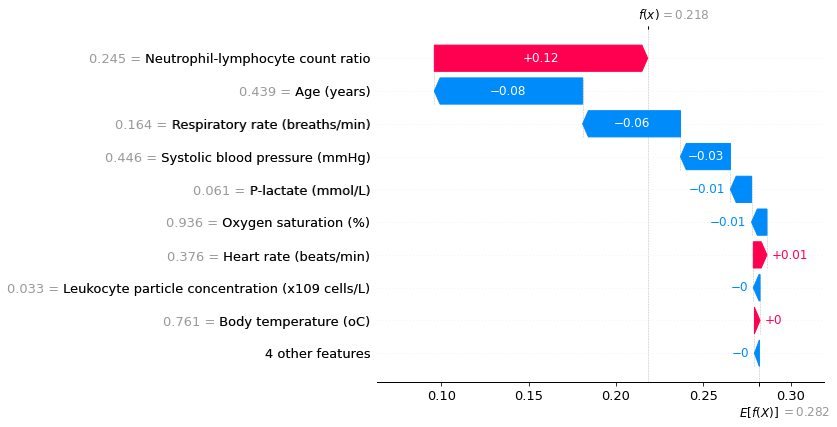

In [ ]:
shap.initjs()
shap.plots.waterfall(shap_values[1])

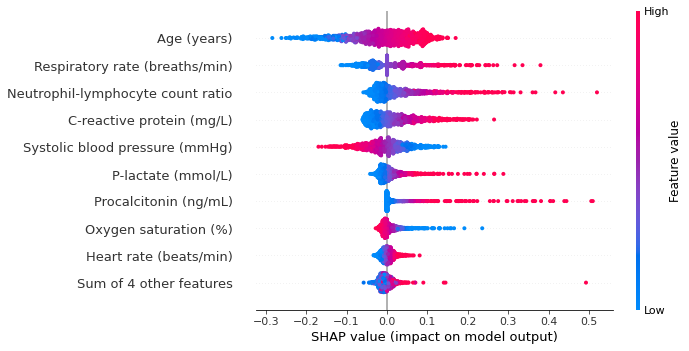

In [ ]:
shap.initjs()
shap.plots.beeswarm(shap_values)

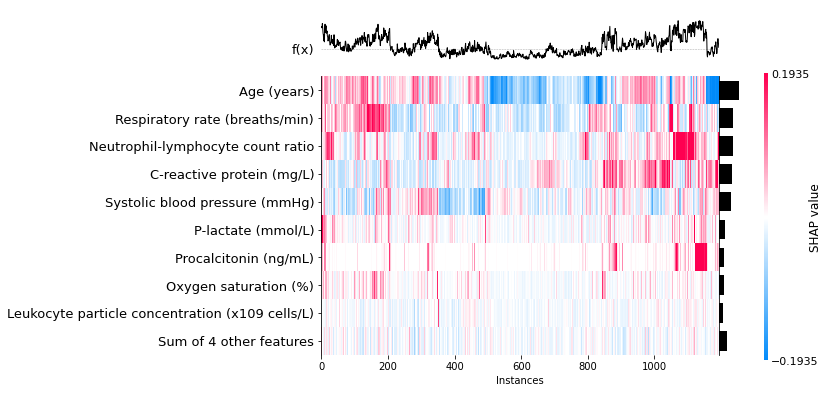

In [ ]:
shap.plots.heatmap(shap_values)

In [ ]:
!pip install lime
import lime
import lime.lime_tabular

     |████████████████████████████████| 276kB 5.9MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=c78b101d26a8154d850bb25e8eeb72484d47480137c4d314ab107bdb87780a57
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
#l_explainer = lime.lime_tabular.LimeTabularExplainer(trainxr, feature_names=list(dfnv_x.columns), class_names=['No sepsis', 'Sepsis-3'], mode='classification')
nnX_train, nnX_test, nny_train, nny_test = train_test_split(df_nn, df_nn_l['Bacterial sepsis using Sepsis-3 criteria (yes/no)'], test_size=0.25, random_state = 10000)  
l_explainer = lime.lime_tabular.LimeTabularExplainer(nnX_train.values.astype('float32'), feature_names=list(df_nn.columns), class_names=['No sepsis', 'Sepsis-3'], mode='classification')

In [ ]:
df_nn_l

Age (years)  ...  Bacterial sepsis using Sepsis-3 criteria (yes/no)
0            79.0  ...                                                0.0
2            54.0  ...                                                0.0
3            52.0  ...                                                0.0
5            57.0  ...                                                1.0
6            76.0  ...                                                1.0
...           ...  ...                                                ...
1565         46.0  ...                                                0.0
1566         18.0  ...                                                0.0
1567         67.0  ...                                                0.0
1569         63.0  ...                                                0.0
1570         73.0  ...                                                0.0

[1194 rows x 14 columns]

In [ ]:
df_nn

Age (years)  ...  P-lactate (mmol/L)
0            79.0  ...                1.52
2            54.0  ...                1.28
3            52.0  ...                2.46
5            57.0  ...                1.07
6            76.0  ...                1.45
...           ...  ...                 ...
1565         46.0  ...                1.34
1566         18.0  ...                1.71
1567         67.0  ...                1.90
1569         63.0  ...                1.80
1570         73.0  ...                2.00

[1194 rows x 13 columns]

In [ ]:
df_normal

Age (years)  ...  Bacterial sepsis using Sepsis-3 criteria (yes/no)
0        0.743902  ...                                                0.0
1        0.439024  ...                                                0.0
2        0.414634  ...                                                0.0
3        0.475610  ...                                                1.0
4        0.707317  ...                                                1.0
...           ...  ...                                                ...
1189     0.341463  ...                                                0.0
1190     0.000000  ...                                                0.0
1191     0.597561  ...                                                0.0
1192     0.548780  ...                                                0.0
1193     0.670732  ...                                                0.0

[1194 rows x 14 columns]

In [ ]:
#this person is medium likely to be septic

exp = l_explainer.explain_instance(dfnv_x.iloc[11,:], nn_model.predict, num_features=8, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)


                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


In [ ]:
#this part is not working
#values need to be normalized for some reason?
#maybe just needs a kernel reset?
exp = l_explainer.explain_instance(df_nn.iloc[11,:], nn_model.predict, num_features=8, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)


                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


In [ ]:
#this person is very unlikely to be septic
exp = l_explainer.explain_instance(dfnv_x.iloc[1,:], nn_model.predict, num_features=8, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)


                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


In [ ]:
#this person is very likely to be septic
exp = l_explainer.explain_instance(dfnv_x.iloc[911,:], nn_model.predict, num_features=8, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)


                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


In [ ]:
'''
l_explainer = lime.lime_tabular.LimeTabularExplainer(dfnv_x.values, feature_names=list(df_normal.columns[:-1]), class_names=[0,1], discretize_continuous=True)
#def prob(data):
#    return np.array(list(zip(1-model.predict(data),model.predict(data))))

def prediction_function(n):
  value = nn_model.predict(n)
  return np.array(list(zip(np.around(value,decimals=4),np.around(1-value,decimals=4))))

l_explainer = lime.lime_tabular.LimeTabularExplainer(dfnv_x[list(X.columns)].astype(int).values, mode='classification',training_labels=new_df['isFraud'],feature_names=list(X.columns))

i = 2
print(np.array([dfnv_x.iloc[i].values.astype('float32')]))
print(prediction_function(np.array([dfnv_x.iloc[i].values.astype('float32')])))

exp = explainer.explain_instance(dfnv_x.loc[i,list(X.columns)].astype('int').values, prediction_function, num_feature=5)##visualize the result
exp.show_in_notebook(show_table=True)

#exp = l_explainer.explain_instance(dfnv_x.iloc[i].astype('float32').values, nn_model.predict)
#exp.show_in_notebook(show_table=True)
'''